In [4]:
import numpy as np
import pandas as pd

#to check the data type
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#for visulazation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to build and analyze various statistical models we use"statsmodels"
import scipy
import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#for multicolineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
#for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.utils import resample
#for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
#Adaptive boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
#Search methods
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")

In [7]:
data = pd.read_csv("cancerdata/hypothyroid.csv")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [9]:
data.replace('?',np.nan,inplace=True)

In [10]:
data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [11]:
data.median()

age     54.00
TSH      1.40
T3       2.00
TT4    103.00
T4U      0.98
FTI    107.00
TBG       NaN
dtype: float64

In [12]:
data.sex.mode()

0    F
Name: sex, dtype: object

In [13]:
data.sex.fillna(('F'),inplace=True)
data.age.fillna(int('54'),inplace=True)
data.TSH.fillna(float('1.40'),inplace=True)
data.T3.fillna(float('2'),inplace=True)
data.TT4.fillna(float('103'),inplace=True)
data.T4U.fillna(float('0.98'),inplace=True)
data.FTI.fillna(float('104'),inplace=True)
data.drop(["TBG"],axis=1,inplace=True)

In [14]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
referral source              0
binaryClass                  0
dtype: int64

In [15]:
data.nunique()

age                           94
sex                            2
on thyroxine                   2
query on thyroxine             2
on antithyroid medication      2
sick                           2
pregnant                       2
thyroid surgery                2
I131 treatment                 2
query hypothyroid              2
query hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH measured                   2
TSH                          288
T3 measured                    2
T3                            70
TT4 measured                   2
TT4                          242
T4U measured                   2
T4U                          147
FTI measured                   2
FTI                          235
TBG measured                   1
referral source                5
binaryClass                    2
dtype: int64

In [16]:
data.duplicated().sum()

63

In [17]:
data.shape

(3772, 29)

In [18]:
data['age']=data['age'].astype("int")
data['FTI']=data['FTI'].astype("float")
data['T4U']=data['T4U'].astype("float")
data['TT4']=data['TT4'].astype("float")
data['TSH']=data['TSH'].astype("float")
data['T3']=data['T3'].astype("float")

In [19]:
data.dtypes

age                            int32
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
TBG measured                  object
r

In [20]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.736479,4.726104,2.010748,107.993584,0.993461,109.809305
std,20.082329,23.316598,0.738282,34.520088,0.185212,31.416216
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000
25%,36.000000,0.600000,1.700000,89.000000,0.890000,94.000000
50%,54.000000,1.400000,2.000000,103.000000,0.980000,104.000000
75%,67.000000,2.425000,2.200000,123.000000,1.070000,121.250000
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000


In [21]:
data.describe(include=object)

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,P
freq,2630,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


In [22]:
data_numeric=data.select_dtypes(include=np.number)
data_numeric

,age,TSH,T3,TT4,T4U,FTI
0,41,1.30,2.5,125.0,1.14,109.0
1,23,4.10,2.0,102.0,0.98,104.0
2,46,0.98,2.0,109.0,0.91,120.0
3,70,0.16,1.9,175.0,0.98,104.0
4,70,0.72,1.2,61.0,0.87,70.0
...,...,...,...,...,...,...
3767,30,1.40,2.0,103.0,0.98,104.0
3768,68,1.00,2.1,124.0,1.08,114.0
3769,74,5.10,1.8,112.0,1.07,105.0
3770,72,0.70,2.0,82.0,0.94,87.0


In [23]:
data_numeric.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

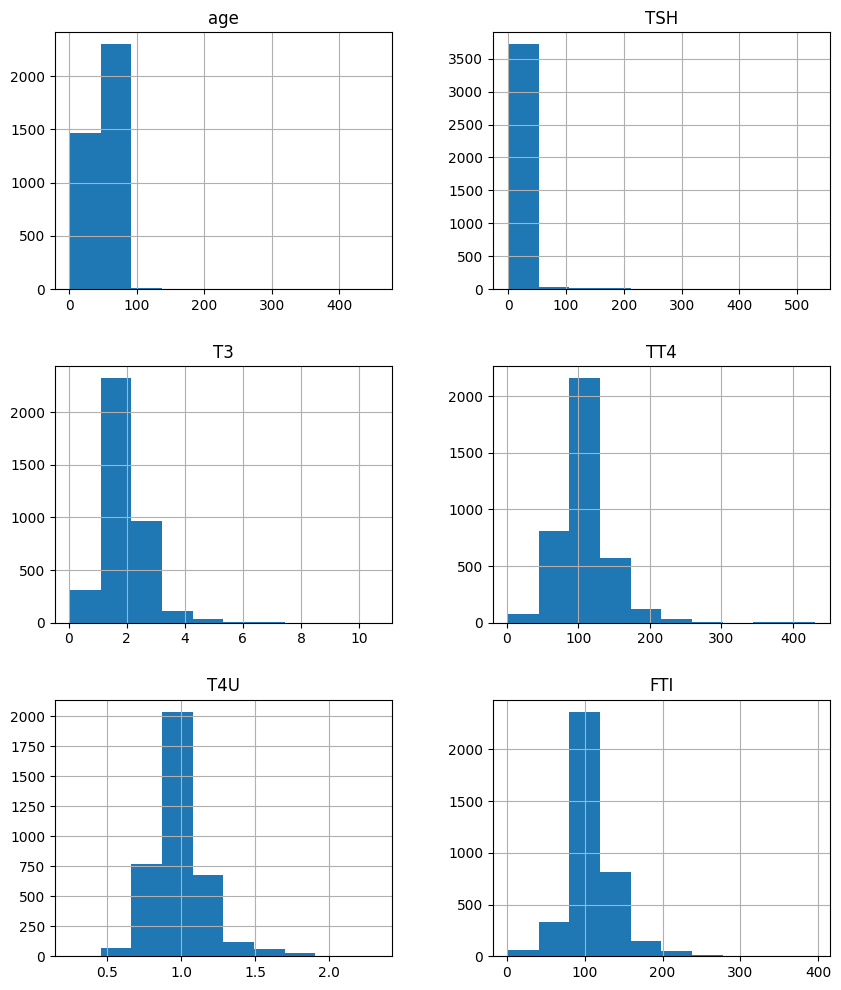

In [24]:
data_numeric.hist(bins=10,figsize=(10,12))
plt.show()

<AxesSubplot: xlabel='FTI'>

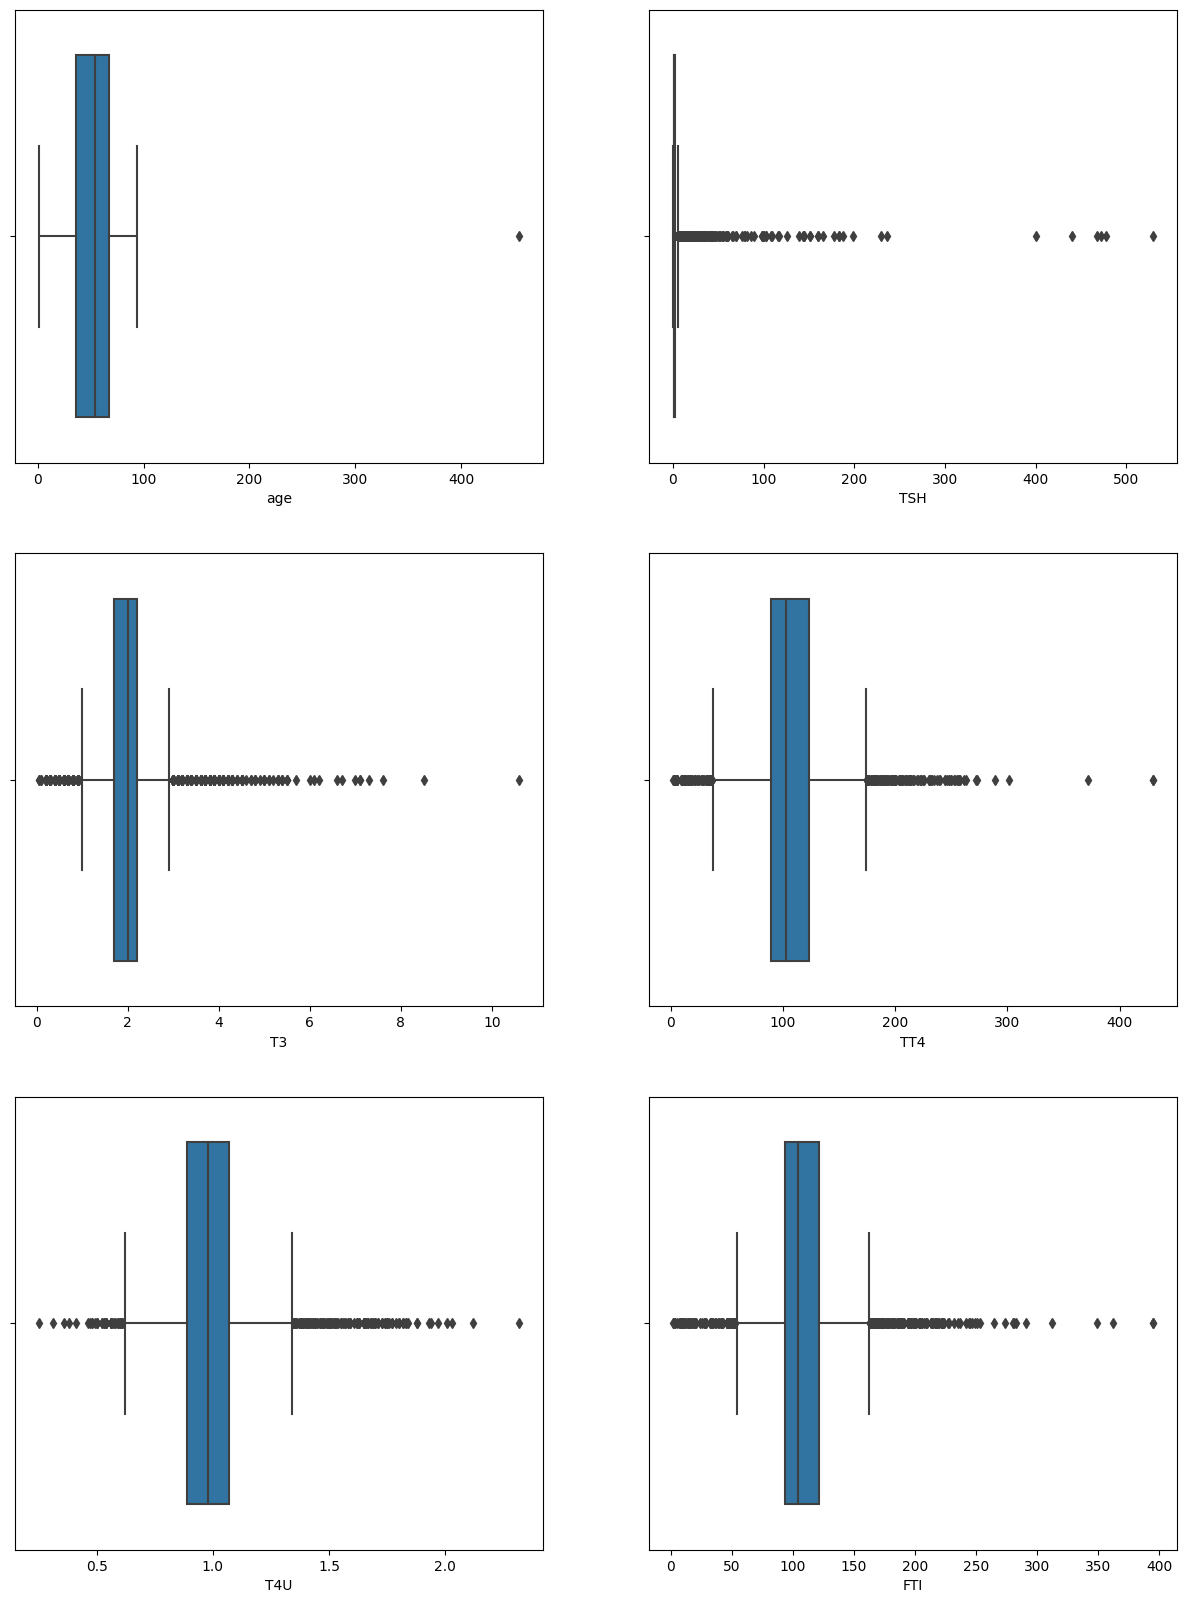

In [25]:
fig, axarr = plt.subplots(3,2,figsize=(15,20))
sns.boxplot(x=data['age'],ax=axarr[0,0])
sns.boxplot(x=data['TSH'],ax=axarr[0,1])
sns.boxplot(x=data['T3'],ax=axarr[1,0])
sns.boxplot(x=data['TT4'],ax=axarr[1,1])
sns.boxplot(x=data['T4U'],ax=axarr[2,0])
sns.boxplot(x=data['FTI'],ax=axarr[2,1])

In [26]:
Q1= data.age.quantile(0.25)
Q2= data.age .quantile(0.50)
Q3= data.age.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.age[(data.age < lowerend) | (data.age>upperend)]
len(data.age[data.age> upperend])

1

In [27]:
data.age= np.where(data.age>upperend ,upperend,data.age)
data.age= np.where(data.age <lowerend ,lowerend,data.age )

In [28]:
Q1= data.T3 .quantile(0.25)
Q2= data.T3 .quantile(0.50)
Q3= data.T3.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.T3[(data.T3 < lowerend) | (data.T3>upperend)]
len(data.T3[data.T3> upperend])

242

In [29]:
data.T3= np.where(data.T3>upperend ,upperend,data.T3)
data.T3= np.where(data.T3 <lowerend ,lowerend,data.T3 )

In [30]:
Q1= data.TSH .quantile(0.25)
Q2= data.TSH .quantile(0.50)
Q3= data.TSH.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.TSH[(data.TSH < lowerend) | (data.TSH>upperend)]
len(data.TSH[data.TSH> upperend])

424

In [31]:
data.TSH= np.where(data.TSH>upperend ,upperend,data.TSH)
data.TSH= np.where(data.TSH <lowerend ,lowerend,data.TSH )

In [32]:
Q1= data.TT4.quantile(0.25)
Q2= data.TT4.quantile(0.50)
Q3= data.TT4.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.TT4[(data.TT4 < lowerend) | (data.TT4>upperend)]
len(data.TT4[data.TT4> upperend])

153

In [33]:
data.TT4= np.where(data.TT4>upperend ,upperend,data.TT4)
data.TT4= np.where(data.TT4 <lowerend ,lowerend,data.TT4 )

In [34]:
Q1= data.T4U .quantile(0.25)
Q2= data.T4U .quantile(0.50)
Q3= data.T4U.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.T4U[(data.T4U < lowerend) | (data.T4U>upperend)]
len(data.T4U[data.T4U> upperend])

164

In [35]:
data.T4U= np.where(data.T4U>upperend ,upperend,data.T4U)
data.T4U= np.where(data.T4U <lowerend ,lowerend,data.T4U )

In [36]:
Q1= data.FTI .quantile(0.25)
Q2= data.FTI .quantile(0.50)
Q3= data.FTI.quantile(0.75)
IQR = Q3 - Q1
lowerend = Q1 - (1.5 * IQR)
upperend = Q3 + (1.5 * IQR)

dfdia_outliers =data.FTI[(data.FTI < lowerend) | (data.FTI>upperend)]
len(data.FTI[data.FTI> upperend])

194

In [37]:
data.FTI= np.where(data.FTI>upperend ,upperend,data.FTI)
data.FTI= np.where(data.FTI <lowerend ,lowerend,data.FTI )

<AxesSubplot: xlabel='FTI'>

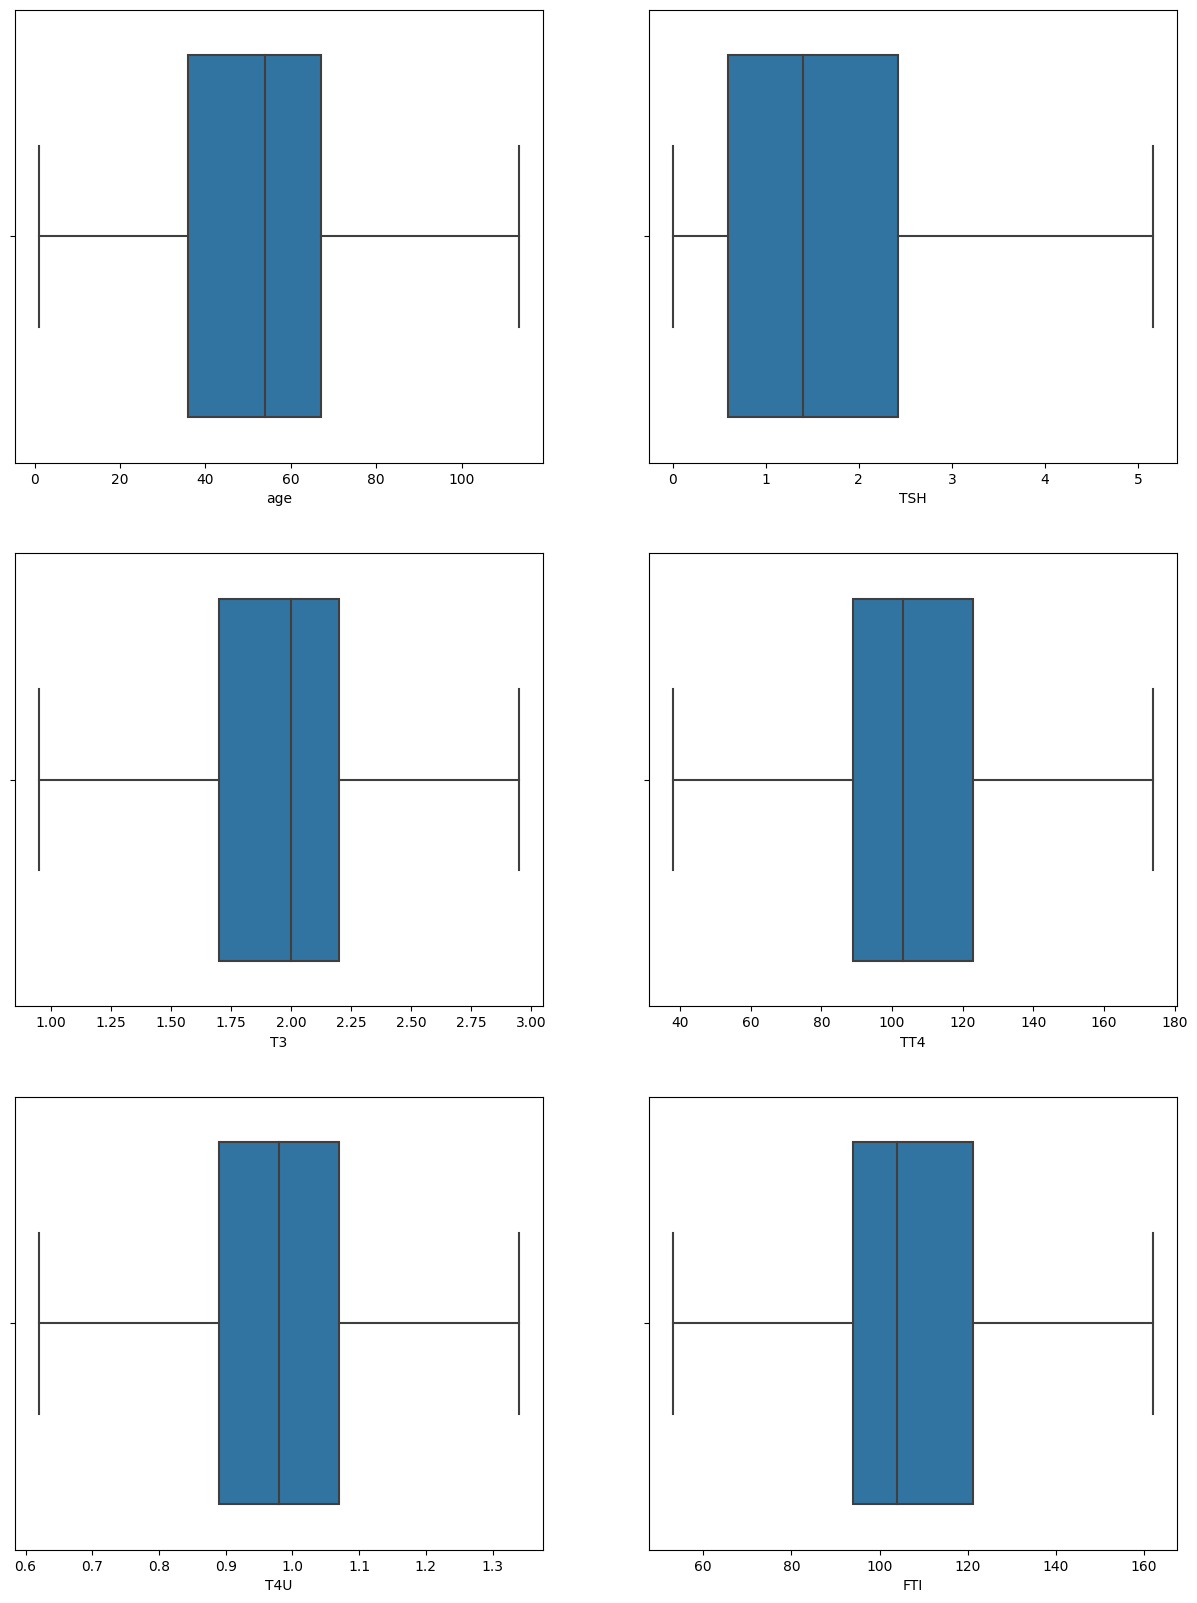

In [38]:
fig, axarr = plt.subplots(3,2,figsize=(15,20))
sns.boxplot(x=data['age'],ax=axarr[0,0])
sns.boxplot(x=data['TSH'],ax=axarr[0,1])
sns.boxplot(x=data['T3'],ax=axarr[1,0])
sns.boxplot(x=data['TT4'],ax=axarr[1,1])
sns.boxplot(x=data['T4U'],ax=axarr[2,0])
sns.boxplot(x=data['FTI'],ax=axarr[2,1])

In [39]:
#statical test for continous data

In [40]:
le=LabelEncoder()
data["binaryClass"]=le.fit_transform(data["binaryClass"])

In [41]:
data_numeric.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [42]:
model = ols('binaryClass ~age',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,0.0011,0.0011,0.0149,0.903
Residual,3770.0,268.5490,0.0712,NaN,NaN


In [43]:
model = ols('binaryClass ~TSH',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
TSH,1.0,98.4322,98.4322,2181.3644,0.0
Residual,3770.0,170.1179,0.0451,NaN,NaN


In [44]:
model = ols('binaryClass ~T3',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
T3,1.0,9.2055,9.2055,133.8164,0.0
Residual,3770.0,259.3446,0.0688,NaN,NaN


In [45]:
model = ols('binaryClass ~TT4',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
TT4,1.0,23.5532,23.5532,362.4355,0.0
Residual,3770.0,244.9969,0.0650,NaN,NaN


In [46]:
model = ols('binaryClass ~T4U',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
T4U,1.0,0.4785,0.4785,6.7298,0.0095
Residual,3770.0,268.0716,0.0711,NaN,NaN


In [47]:
model = ols('binaryClass ~FTI',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
FTI,1.0,26.8020,26.8020,417.9703,0.0
Residual,3770.0,241.7481,0.0641,NaN,NaN


In [48]:
data.drop(["age"],axis=1,inplace=True)

In [49]:
data['binaryClass']=data['binaryClass'].astype("object")

In [50]:
#multicolinearity

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sex                        3772 non-null   object 
 1   on thyroxine               3772 non-null   object 
 2   query on thyroxine         3772 non-null   object 
 3   on antithyroid medication  3772 non-null   object 
 4   sick                       3772 non-null   object 
 5   pregnant                   3772 non-null   object 
 6   thyroid surgery            3772 non-null   object 
 7   I131 treatment             3772 non-null   object 
 8   query hypothyroid          3772 non-null   object 
 9   query hyperthyroid         3772 non-null   object 
 10  lithium                    3772 non-null   object 
 11  goitre                     3772 non-null   object 
 12  tumor                      3772 non-null   object 
 13  hypopituitary              3772 non-null   objec

In [52]:
x=data.iloc[:,[16,18,20,22,24]]
x['intersept']=1
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

In [53]:
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
print(vif_data)

     feature         VIF
0        TSH    1.238665
1         T3    1.382491
2        TT4   10.630088
3        T4U    4.699283
4        FTI    8.750271
5  intersept  251.085153


In [54]:
data.drop(["TT4"],axis=1,inplace=True)

<AxesSubplot: >

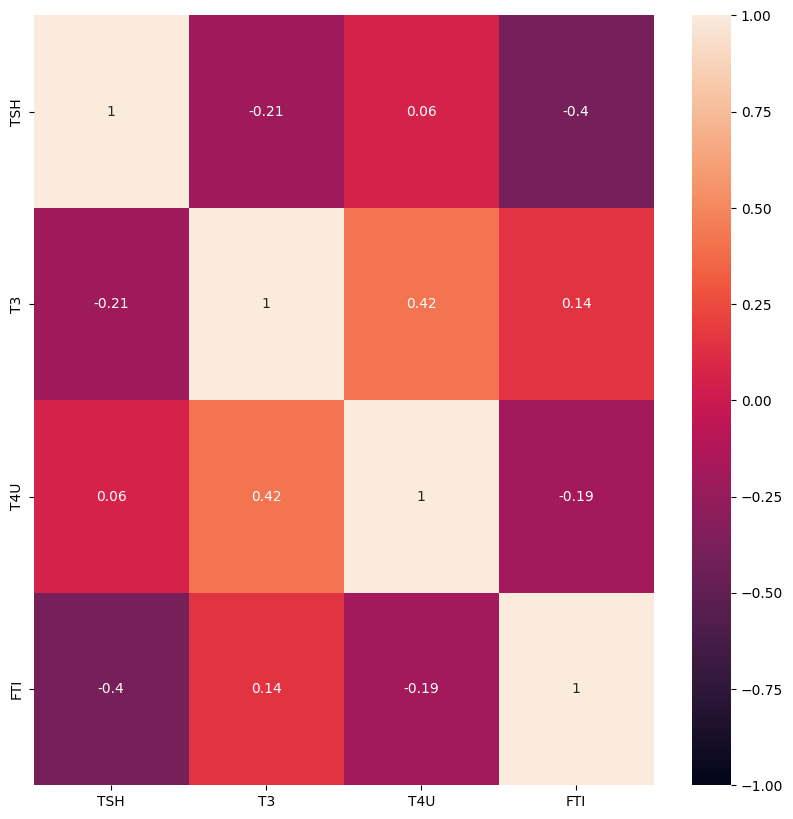

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, vmin= -1, vmax=1)

In [56]:
data.cov()

,TSH,T3,T4U,FTI
TSH,2.539745,-0.172877,0.014568,-15.371002
T3,-0.172877,0.257785,0.032576,1.753571
T4U,0.014568,0.032576,0.023270,-0.714854
FTI,-15.371002,1.753571,-0.714854,591.023184


In [57]:
data.corr()

,TSH,T3,T4U,FTI
TSH,1.000000,-0.213655,0.059926,-0.396739
T3,-0.213655,1.000000,0.420606,0.142067
T4U,0.059926,0.420606,1.000000,-0.192760
FTI,-0.396739,0.142067,-0.192760,1.000000


In [58]:
#visulazation for categorical data

In [59]:
data.describe(include=object)

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,1
freq,2630,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


ValueError: could not convert string to float: 'F'

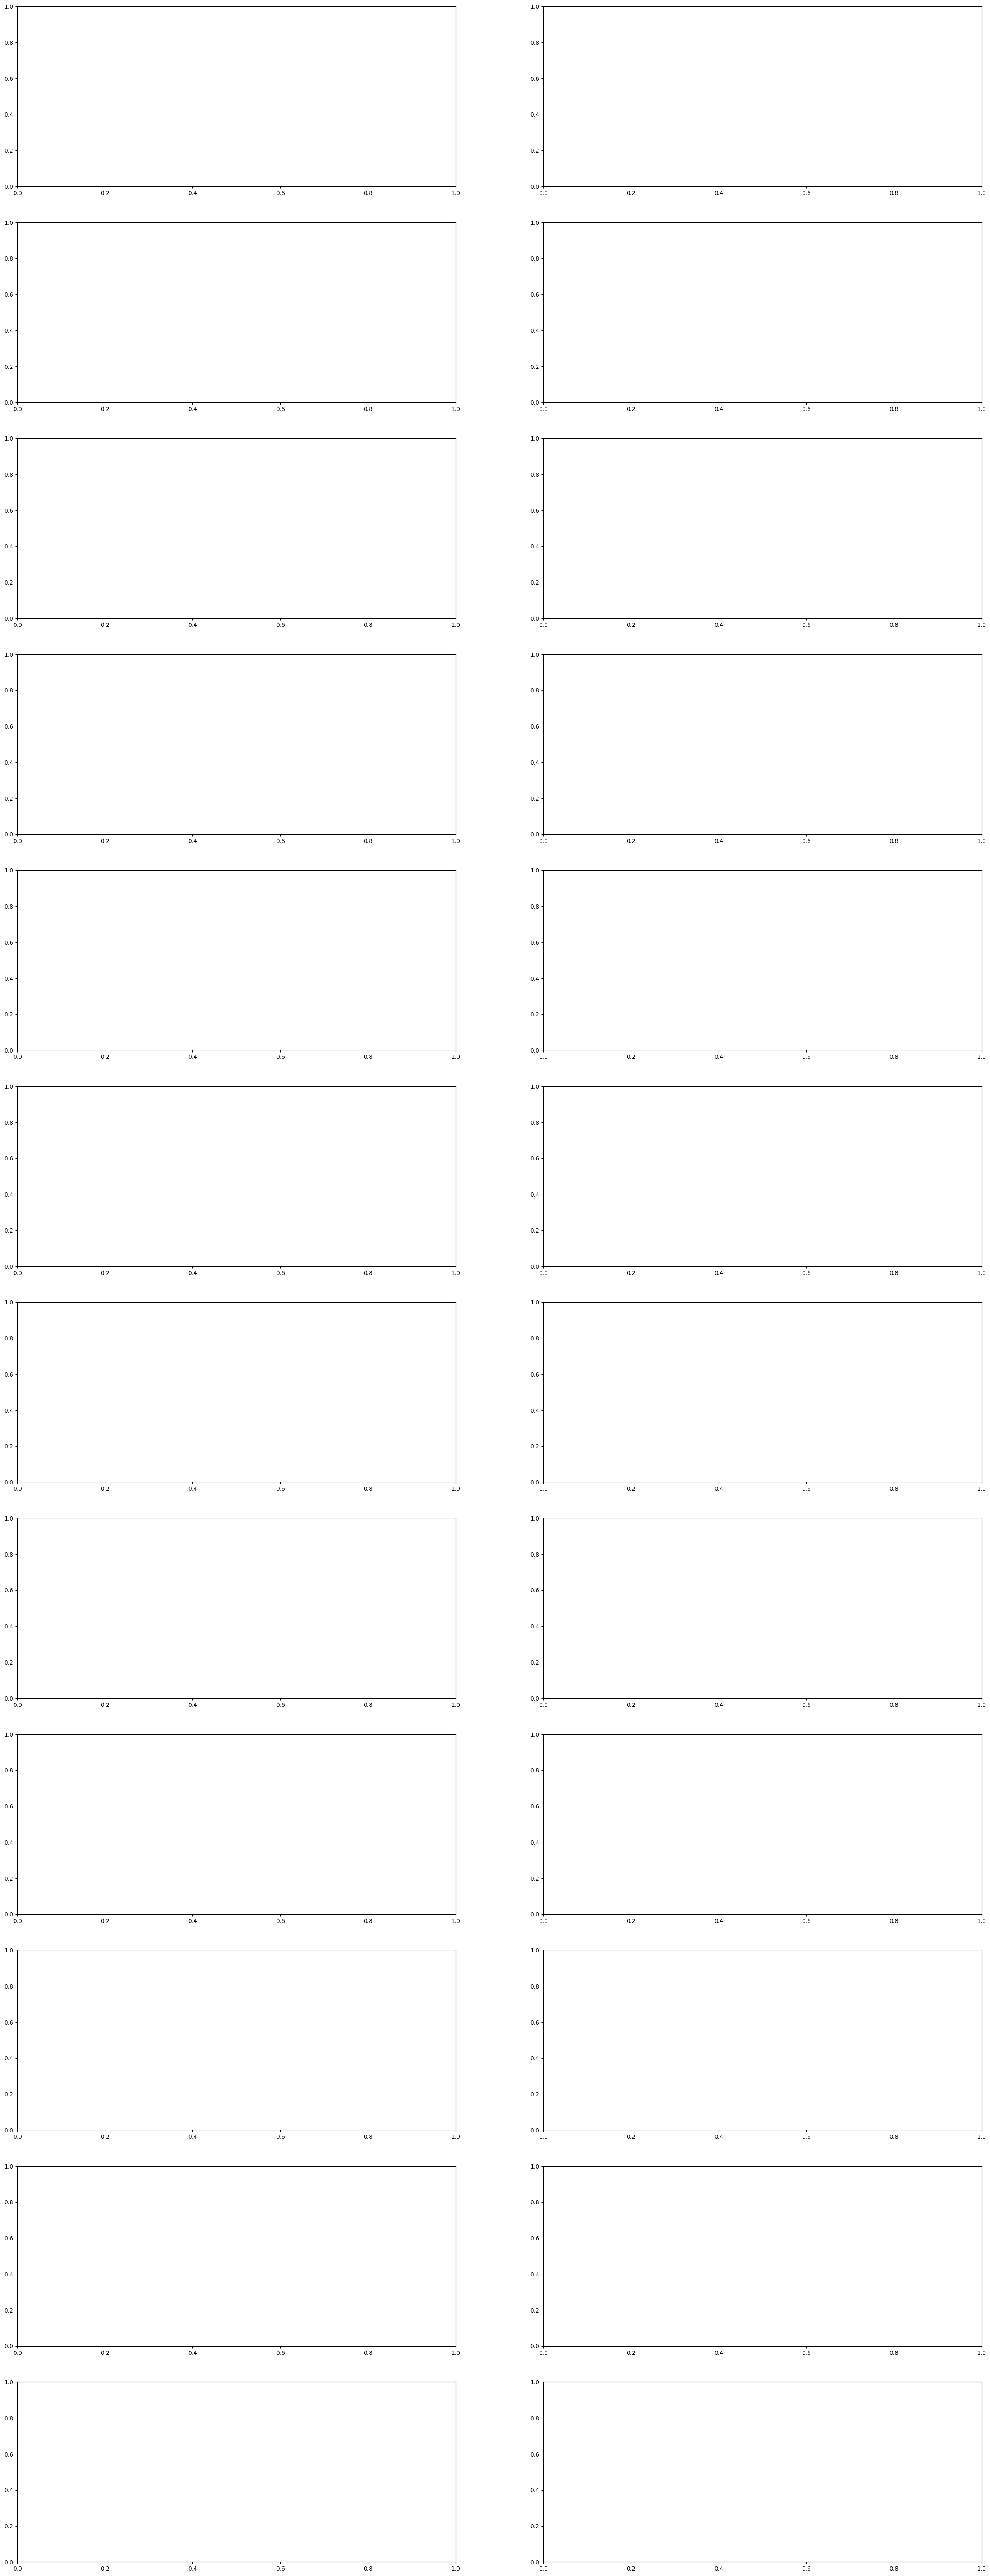

In [67]:
categorical=[]
for column in data:
      if is_string_dtype(data[column]):
        categorical.append(column)      
fig,ax=plt.subplots(nrows=12,ncols=2,figsize=(30,80))
for variable,subplot in zip(categorical,ax.flatten()):
    sns.countplot(data[variable].astype(float),ax=subplot)
    
plt.show()

In [68]:
#statitical test for categorical data

In [69]:
data.describe(include=object)

,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,...,hypopituitary,psych,TSH measured,T3 measured,TT4 measured,T4U measured,FTI measured,TBG measured,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,5,2
top,F,f,f,f,f,f,f,f,f,f,...,f,f,t,t,t,t,t,f,other,1
freq,2630,3308,3722,3729,3625,3719,3719,3713,3538,3535,...,3771,3588,3403,3003,3541,3385,3387,3772,2201,3481


In [78]:
le=LabelEncoder()
data["sex"]=le.fit_transform(data["sex"])
data["on thyroxine"]=le.fit_transform(data["on thyroxine"])
data["query on thyroxine"]=le.fit_transform(data["query on thyroxine"])
data["on antithyroid medication"]=le.fit_transform(data["on antithyroid medication"])
data["sick"]=le.fit_transform(data["sick"])
data["pregnant"]=le.fit_transform(data["pregnant"])
data["thyroid surgery"]=le.fit_transform(data["thyroid surgery"])
data["I131 treatment"]=le.fit_transform(data["I131 treatment"])
data["query hypothyroid"]=le.fit_transform(data["query hypothyroid"])
data["hypopituitary"]=le.fit_transform(data["hypopituitary"])
data["psych"]=le.fit_transform(data["psych"])
data["TSH measured"]=le.fit_transform(data["TSH measured"])
data["T3 measured"]=le.fit_transform(data["T3 measured"])
data["TT4 measured"]=le.fit_transform(data["TT4 measured"])
data["T4U measured"]=le.fit_transform(data["T4U measured"])
data["FTI measured"]=le.fit_transform(data["FTI measured"])
data["TBG measured"]=le.fit_transform(data["TBG measured"])
data["query hyperthyroid"]=le.fit_transform(data["query hyperthyroid"])
data["lithium"]=le.fit_transform(data["lithium"])
data["goitre"]=le.fit_transform(data["goitre"])
data["tumor"]=le.fit_transform(data["tumor"])
data["referral source"]=le.fit_transform(data["referral source"])
data["binaryClass"]=le.fit_transform(data["binaryClass"])

In [76]:
print(data.columns)

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'referral source',
       'binaryClass'],
      dtype='object')


In [79]:
sex=pd.crosstab(data.binaryClass ,data.sex , margins = True)
scipy.stats.chi2_contingency(sex ,correction= False )

Chi2ContingencyResult(statistic=9.414729917972014, pvalue=0.05152915473580807, dof=4, expected_freq=array([[ 202.89766702,   88.10233298,  291.        ],
       [2427.10233298, 1053.89766702, 3481.        ],
       [2630.        , 1142.        , 3772.        ]]))

In [83]:
onthyroxine=pd.crosstab(data.binaryClass ,data['on thyroxine'] , margins = True)
scipy.stats.chi2_contingency(onthyroxine ,correction= False ) 

Chi2ContingencyResult(statistic=24.78490644014187, pvalue=5.55758466257417e-05, dof=4, expected_freq=array([[ 255.20360551,   35.79639449,  291.        ],
       [3052.79639449,  428.20360551, 3481.        ],
       [3308.        ,  464.        , 3772.        ]]))

In [84]:
queryonthyroxine=pd.crosstab(data.binaryClass ,data['query on thyroxine'] , margins = True)
scipy.stats.chi2_contingency(queryonthyroxine ,correction= False )

Chi2ContingencyResult(statistic=0.20927065316276935, pvalue=0.9948930179285833, dof=4, expected_freq=array([[ 287.1426299,    3.8573701,  291.       ],
       [3434.8573701,   46.1426299, 3481.       ],
       [3722.       ,   50.       , 3772.       ]]))

In [86]:
onantithyroidmedication=pd.crosstab(data.binaryClass ,data['on antithyroid medication'] , margins = True)
scipy.stats.chi2_contingency(onantithyroidmedication ,correction= False )

Chi2ContingencyResult(statistic=1.774336854566088, pvalue=0.7771740833309226, dof=4, expected_freq=array([[2.87682662e+02, 3.31733828e+00, 2.91000000e+02],
       [3.44131734e+03, 3.96826617e+01, 3.48100000e+03],
       [3.72900000e+03, 4.30000000e+01, 3.77200000e+03]]))

In [87]:
sick=pd.crosstab(data.binaryClass ,data.sick , margins = True)
scipy.stats.chi2_contingency(sick ,correction= False )

Chi2ContingencyResult(statistic=0.011538665444597326, pvalue=0.9999834212728257, dof=4, expected_freq=array([[ 279.65933192,   11.34066808,  291.        ],
       [3345.34066808,  135.65933192, 3481.        ],
       [3625.        ,  147.        , 3772.        ]]))

In [88]:
pregnant=pd.crosstab(data.binaryClass ,data.pregnant, margins = True)
scipy.stats.chi2_contingency(pregnant,correction= False )

Chi2ContingencyResult(statistic=4.493764830537442, pvalue=0.3432874499949324, dof=4, expected_freq=array([[ 286.9111877,    4.0888123,  291.       ],
       [3432.0888123,   48.9111877, 3481.       ],
       [3719.       ,   53.       , 3772.       ]]))

In [89]:
thyroidsurgery=pd.crosstab(data.binaryClass ,data['thyroid surgery'], margins = True)
scipy.stats.chi2_contingency(thyroidsurgery,correction= False )

Chi2ContingencyResult(statistic=1.172775338192067, pvalue=0.8825603177481023, dof=4, expected_freq=array([[ 286.9111877,    4.0888123,  291.       ],
       [3432.0888123,   48.9111877, 3481.       ],
       [3719.       ,   53.       , 3772.       ]]))

In [90]:
I131treatment=pd.crosstab(data.binaryClass ,data['I131 treatment'], margins = True)
scipy.stats.chi2_contingency(I131treatment,correction= False )

Chi2ContingencyResult(statistic=0.048605445281868484, pvalue=0.9997094300898125, dof=4, expected_freq=array([[ 286.44830329,    4.55169671,  291.        ],
       [3426.55169671,   54.44830329, 3481.        ],
       [3713.        ,   59.        , 3772.        ]]))

In [91]:
queryhypothyroid=pd.crosstab(data.binaryClass ,data['query hypothyroid'], margins = True)
scipy.stats.chi2_contingency(queryhypothyroid,correction= False )

Chi2ContingencyResult(statistic=28.080774496727642, pvalue=1.2011474193008797e-05, dof=4, expected_freq=array([[ 272.94750795,   18.05249205,  291.        ],
       [3265.05249205,  215.94750795, 3481.        ],
       [3538.        ,  234.        , 3772.        ]]))

In [92]:
hypopituitary=pd.crosstab(data.binaryClass ,data.hypopituitary, margins = True)
scipy.stats.chi2_contingency(hypopituitary,correction= False )

Chi2ContingencyResult(statistic=0.08361883592645333, pvalue=0.9991499698928847, dof=4, expected_freq=array([[2.90922853e+02, 7.71474019e-02, 2.91000000e+02],
       [3.48007715e+03, 9.22852598e-01, 3.48100000e+03],
       [3.77100000e+03, 1.00000000e+00, 3.77200000e+03]]))

In [93]:
psych=pd.crosstab(data.binaryClass ,data.psych, margins = True)
scipy.stats.chi2_contingency(psych,correction= False )

Chi2ContingencyResult(statistic=3.0799772054121863, pvalue=0.5445317604132515, dof=4, expected_freq=array([[ 276.80487805,   14.19512195,  291.        ],
       [3311.19512195,  169.80487805, 3481.        ],
       [3588.        ,  184.        , 3772.        ]]))

In [94]:
TSHmeasured=pd.crosstab(data.binaryClass ,data['TSH measured'], margins = True)
scipy.stats.chi2_contingency(TSHmeasured,correction= False )

Chi2ContingencyResult(statistic=34.19204424708313, pvalue=6.805735205990021e-07, dof=4, expected_freq=array([[  28.4673913,  262.5326087,  291.       ],
       [ 340.5326087, 3140.4673913, 3481.       ],
       [ 369.       , 3403.       , 3772.       ]]))

In [95]:
T3measured=pd.crosstab(data.binaryClass ,data['T3 measured'], margins = True)
scipy.stats.chi2_contingency(T3measured,correction= False )

Chi2ContingencyResult(statistic=4.07435562605084, pvalue=0.39603642890655005, dof=4, expected_freq=array([[  59.32635207,  231.67364793,  291.        ],
       [ 709.67364793, 2771.32635207, 3481.        ],
       [ 769.        , 3003.        , 3772.        ]]))

In [97]:
TT4measured=pd.crosstab(data.binaryClass ,data['TT4 measured'], margins = True)
scipy.stats.chi2_contingency(TT4measured,correction= False )

Chi2ContingencyResult(statistic=10.647001376945655, pvalue=0.030831211945707326, dof=4, expected_freq=array([[  17.82104984,  273.17895016,  291.        ],
       [ 213.17895016, 3267.82104984, 3481.        ],
       [ 231.        , 3541.        , 3772.        ]]))

In [98]:
T4Umeasured=pd.crosstab(data.binaryClass ,data['T4U measured'], margins = True)
scipy.stats.chi2_contingency(T4Umeasured,correction= False )

Chi2ContingencyResult(statistic=0.953704264490495, pvalue=0.916732787946529, dof=4, expected_freq=array([[  29.85604454,  261.14395546,  291.        ],
       [ 357.14395546, 3123.85604454, 3481.        ],
       [ 387.        , 3385.        , 3772.        ]]))

In [99]:
FTImeasured=pd.crosstab(data.binaryClass ,data['FTI measured'], margins = True)
scipy.stats.chi2_contingency(FTImeasured,correction= False )

Chi2ContingencyResult(statistic=0.8981753487082761, pvalue=0.9248224498096999, dof=4, expected_freq=array([[  29.70174973,  261.29825027,  291.        ],
       [ 355.29825027, 3125.70174973, 3481.        ],
       [ 385.        , 3387.        , 3772.        ]]))

In [100]:
TBGmeasured=pd.crosstab(data.binaryClass ,data['TBG measured'], margins = True)
scipy.stats.chi2_contingency(TBGmeasured,correction= False )

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=2, expected_freq=array([[ 291.,  291.],
       [3481., 3481.],
       [3772., 3772.]]))

In [101]:
referralsource=pd.crosstab(data.binaryClass ,data['referral source'], margins = True)
scipy.stats.chi2_contingency(referralsource,correction= False )

Chi2ContingencyResult(statistic=17.267479805361095, pvalue=0.06865092435138533, dof=10, expected_freq=array([[8.64050901e+00, 2.97788971e+01, 3.00874867e+00, 7.97704136e+01,
        1.69801432e+02, 2.91000000e+02],
       [1.03359491e+02, 3.56221103e+02, 3.59912513e+01, 9.54229586e+02,
        2.03119857e+03, 3.48100000e+03],
       [1.12000000e+02, 3.86000000e+02, 3.90000000e+01, 1.03400000e+03,
        2.20100000e+03, 3.77200000e+03]]))

In [102]:
data.drop(["query on thyroxine",'referral source','on antithyroid medication','sick','pregnant','thyroid surgery','I131 treatment',
           'hypopituitary','psych','T3 measured','T4U measured','FTI measured','TBG measured'],axis=1,inplace=True)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 3772 non-null   int64  
 1   on thyroxine        3772 non-null   int64  
 2   query hypothyroid   3772 non-null   int64  
 3   query hyperthyroid  3772 non-null   int32  
 4   lithium             3772 non-null   int32  
 5   goitre              3772 non-null   int32  
 6   tumor               3772 non-null   int32  
 7   TSH measured        3772 non-null   int64  
 8   TSH                 3772 non-null   float64
 9   T3                  3772 non-null   float64
 10  TT4 measured        3772 non-null   int64  
 11  T4U                 3772 non-null   float64
 12  FTI                 3772 non-null   float64
 13  binaryClass         3772 non-null   int32  
dtypes: float64(4), int32(5), int64(5)
memory usage: 339.0 KB


In [104]:
data.columns

Index(['sex', 'on thyroxine', 'query hypothyroid', 'query hyperthyroid',
       'lithium', 'goitre', 'tumor', 'TSH measured', 'TSH', 'T3',
       'TT4 measured', 'T4U', 'FTI', 'binaryClass'],
      dtype='object')

In [105]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [106]:
model=LogisticRegression(class_weight=None,random_state=None,solver='lbfgs',max_iter=100)
model1=model.fit(x,y)

In [107]:
model1.intercept_

array([5.26428846])

In [108]:
model1.coef_

array([[ 0.28094155,  2.57893676, -0.15256703, -0.18946956,  0.25432059,
         0.19462505, -0.49875142,  2.64602431, -3.1231892 ,  0.53362434,
         2.20579837,  0.80270702,  0.03710292]])

In [109]:
y_pred=model1.predict(x)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [110]:
cm=metrics=confusion_matrix(y,y_pred)
cm

array([[ 256,   35],
       [  73, 3408]], dtype=int64)

In [111]:
accuracy_score_lr=model1.score(x,y)
accuracy_score_lr

0.9713679745493107

In [112]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       291
           1       0.99      0.98      0.98      3481

    accuracy                           0.97      3772
   macro avg       0.88      0.93      0.91      3772
weighted avg       0.97      0.97      0.97      3772



In [113]:
y_pred_prob=model1.predict_proba(x)
fpr1,tpr1,threshold=roc_curve(y,y_pred_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print(roc_auc1)

0.9886373844858343


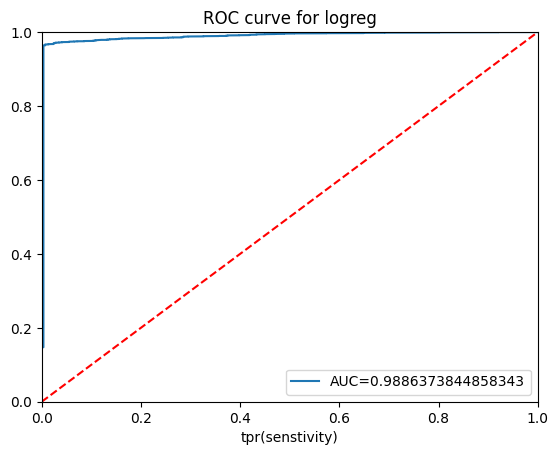

In [114]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr1,tpr1,label="AUC="+str(roc_auc1))
plt.legend(loc=4)
plt.show()

In [115]:
#evuality  test train method

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [117]:
#Randoam forest

In [119]:
model4= RandomForestClassifier(n_estimators =100, max_depth = 3, random_state = 0 )
model4

RandomForestClassifier(max_depth=3, random_state=0)

In [120]:
model4.fit(x_train,y_train)
model4

RandomForestClassifier(max_depth=3, random_state=0)

In [121]:
y_pred= model4.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [122]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,22,36,58
1,1,696,697
All,23,732,755


In [123]:
confusion_matrix(y_test,y_pred)

array([[ 22,  36],
       [  1, 696]], dtype=int64)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.38      0.54        58
           1       0.95      1.00      0.97       697

    accuracy                           0.95       755
   macro avg       0.95      0.69      0.76       755
weighted avg       0.95      0.95      0.94       755



In [125]:
accuracy_score_rf=(accuracy_score(y_test, y_pred))
accuracy_score_rf

0.9509933774834437

In [126]:
# roc curve
y_pred_prob=model4.predict_proba(x_test)
fpr4,tpr4,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc4=auc(fpr4,tpr4)
print(roc_auc4)

0.9941745411368922


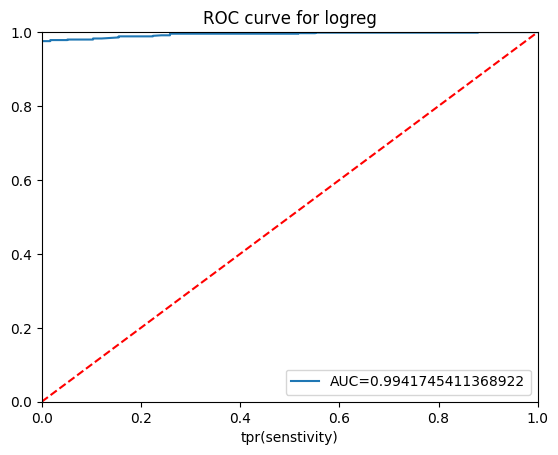

In [127]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr4,tpr4,label="AUC="+str(roc_auc4))
plt.legend(loc=4)
plt.show()

In [128]:
#gradient Boosting classifier

In [129]:
model7= GradientBoostingClassifier(max_depth=4,n_estimators =50,learning_rate=1.0,random_state=0)
model7

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=50,
                           random_state=0)

In [130]:
model7= model7.fit(x_train,y_train)
model7

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=50,
                           random_state=0)

In [131]:
y_predGB=model7.predict(x_test)
print(y_predGB)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 

In [132]:
pd.crosstab(y_test,y_predGB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,27,31,58
1,2,695,697
All,29,726,755


In [133]:
confusion_matrix(y_test,y_pred)

array([[ 22,  36],
       [  1, 696]], dtype=int64)

In [134]:
accuracy_score_gb=(accuracy_score(y_test,y_predGB))
accuracy_score_gb

0.9562913907284768

In [135]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        58
           1       0.96      1.00      0.98       697

    accuracy                           0.96       755
   macro avg       0.94      0.73      0.80       755
weighted avg       0.96      0.96      0.95       755



In [136]:
# roc curve
y_pred_prob=model7.predict_proba(x_test)
fpr7,tpr7,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc7=auc(fpr7,tpr7)
print(roc_auc7)

0.47673526938109145


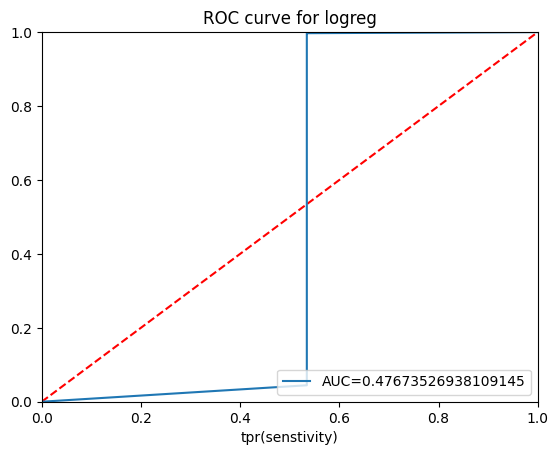

In [137]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr7,tpr7,label="AUC="+str(roc_auc7))
plt.legend(loc=4)
plt.show()